In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.geom2d import SplineGeometry
import numpy as np
from scipy.sparse import csr_matrix
from krylov_solver import KrylovSolver
from l2_minimization import compute_alpha as alpha_l2

In [2]:
geo = SplineGeometry()
geo.AddRectangle((0,0),(pow(2, 1/3),1))
mesh = Mesh(geo.GenerateMesh(maxh=0.05))
Draw (mesh)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [3]:
fes = H1(mesh, order=1)
gf = GridFunction(fes, multidim=mesh.nv)
for i in range (mesh.nv):
    gf.vecs[i][:] = 0
    gf.vecs[i][i] = 1
scene = Draw (gf, mesh, deformation=True, animate=True);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

det(X) = inf, cond(X) = 123816.01818550748
Discretization: 629 degrees of freedom.


C:\Users\micha\Documents\Studia\Bachelorarbeit\FTD\krylov_solver.py:153: RuntimeWarning: divide by zero encountered in log
  return marker, cmap(norm(np.log(dist)))


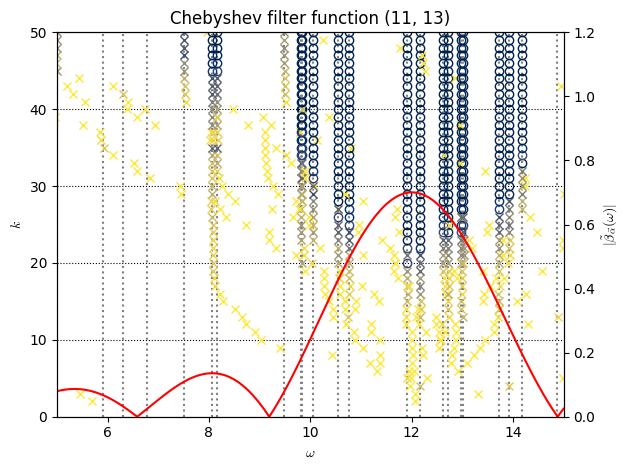

In [8]:
tau = 0.0056        # controlled interval up to omega_end = 360
L = 200
om_min, om_max = 11, 13
alpha = alpha_l2(2/tau, L, tau, om_min, om_max)

solver = KrylovSolver(mesh, L, tau, alpha, m_max = 50)
solver.discretize()
solver.solve()
solver.plot_results(5, 15, f"Chebyshev filter function ({om_min}, {om_max})")

In [10]:
eigval, eigvec = solver.get_single_result(20, 12*12)

In [11]:
solution = GridFunction(fes, multidim=1)
for i, coord in enumerate(eigvec):
    solution.vecs[0][i] = coord
Draw(solution, mesh, deformation=True)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene